In [1]:
# Import libraries
import pandas as pd
import random

# Import Scripts
from Utils import ValidateModel
from Data_loaders import load_batch, User_vocab,Category_vocab,Subcategory_vocab , User_vali, UserData 

/Users/magnusharder/Documents/UNI-DTU/6. Semester/Bachelor Projekt/News-Recommendations/.venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data contains 17 topics and 264 subtopics


In [2]:
# Load Model
from LSTUR import LSTUR_con
from torch import nn,optim
device = "cpu"
max_history_length = 50


LSTUR_con_module = LSTUR_con(
    seq_len = max_history_length,
    user_dim=300,
    user_size=User_vocab.__len__(),
    topic_size=Category_vocab.__len__(),
    topic_dim=100,
    subtopic_size=Subcategory_vocab.__len__(),
    subtopic_dim=100,
    word_dim=300,
    device=device
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(LSTUR_con_module.parameters(), lr=0.001)

model = LSTUR_con_module.to(device)


In [3]:
BatchSize = 2

model = LSTUR_con_module.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
Softmax = nn.Softmax(dim=1)
Validation = ValidateModel(data_loader = load_batch, data = User_vali, batch_size=BatchSize, metrics = ['MRR','ROC_AUC'], device=device,train=False)

AUC = []
losses = []

for epoch in range(1):

    BatchLoader = load_batch(UserData, batch_size=BatchSize,train = True, device=device)

    for _ in range(1):
        User_en, Category, Subcategory, History_tensor, history_len, Category_Impressions, Subcategory_Impressions, Impressions_tensor, Impressions_len, Clicked = BatchLoader.__next__()

        optimizer.zero_grad()

        output = model(User_en, Category, Subcategory, History_tensor, history_len, Category_Impressions, Subcategory_Impressions, Impressions_tensor)

        loss = loss_fn(output, Clicked)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        print(loss)
    
    print("Validation")
    score = Validation.get_metrics(model, batches=10)
    AUC.append(score)

    print(f"AUC: {score}")




tensor(28.0724, grad_fn=<NllLossBackward0>)
Validation
0.5
0.5
0.0
0.5
0.5
0.0
0.0
1.0
0.0
0.0
AUC: 0.3


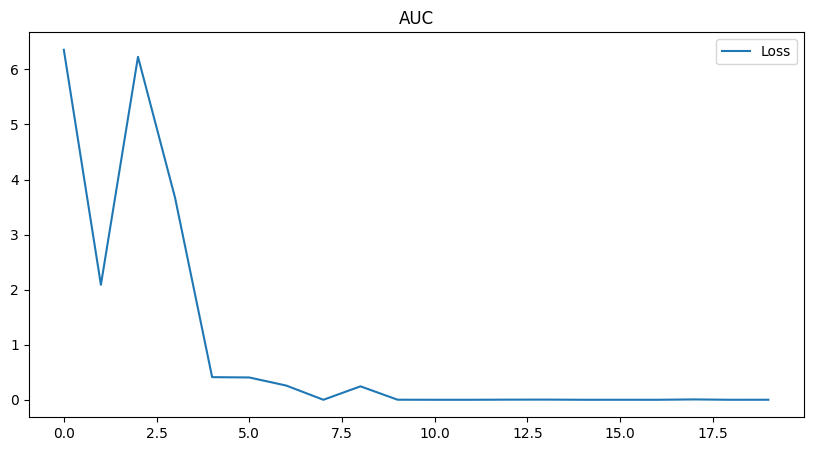

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(10, 5))

#axs.plot(AUC, label='AUC')
axs.plot(losses, label='Loss')
axs.set_title('AUC')
axs.legend()
plt.show()
